In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("./drug200.csv")

In [3]:
df.shape

(200, 6)

In [4]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [6]:
df.isna().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

<AxesSubplot:xlabel='Drug', ylabel='count'>

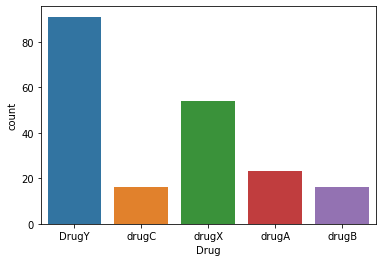

In [7]:
sns.countplot(data=df, x="Drug")

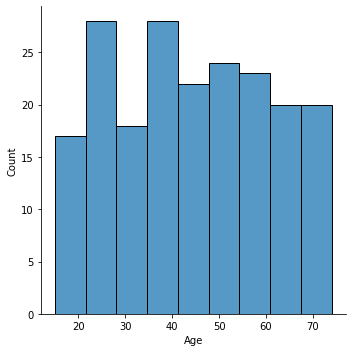

In [8]:
sns.displot(data=df, x="Age")

<AxesSubplot:xlabel='Age'>

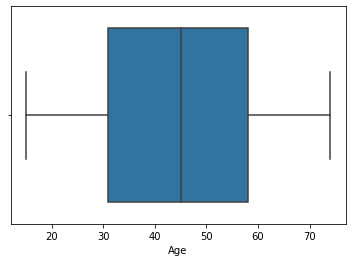

In [9]:
sns.boxplot(data=df, x="Age")

<AxesSubplot:xlabel='Sex', ylabel='count'>

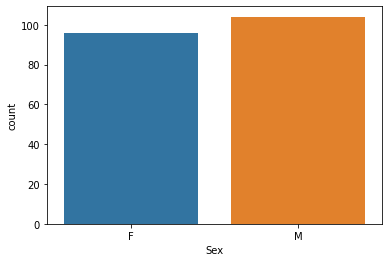

In [10]:
sns.countplot(data=df, x="Sex")

<AxesSubplot:xlabel='BP', ylabel='count'>

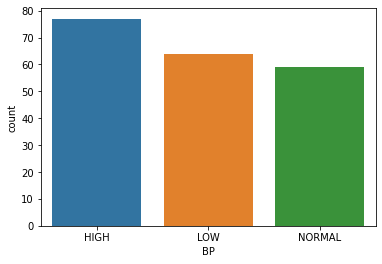

In [11]:
sns.countplot(data=df, x="BP")

<AxesSubplot:xlabel='Cholesterol', ylabel='count'>

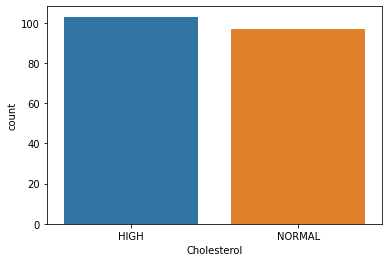

In [12]:
sns.countplot(data=df, x="Cholesterol")

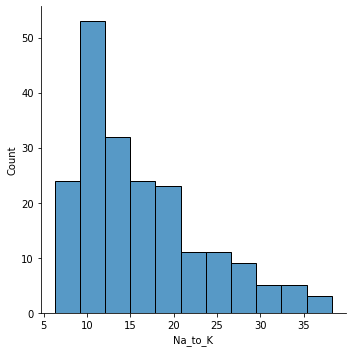

In [13]:
sns.displot(data=df, x="Na_to_K")

<AxesSubplot:xlabel='BP', ylabel='count'>

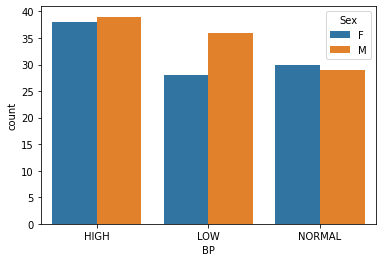

In [14]:
sns.countplot(data=df, x="BP", hue="Sex")

<AxesSubplot:xlabel='BP', ylabel='Age'>

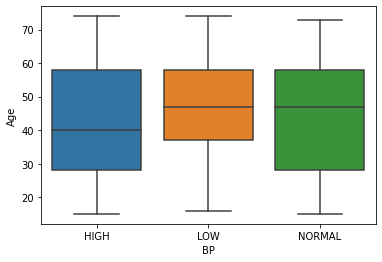

In [15]:
sns.boxplot(data=df, x="BP", y="Age")

<AxesSubplot:xlabel='BP', ylabel='count'>

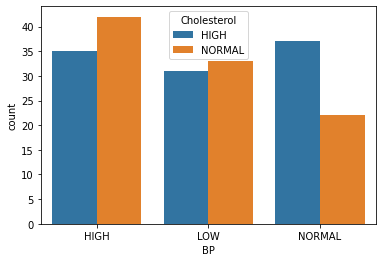

In [16]:
sns.countplot(data=df, x="BP", hue="Cholesterol")

<AxesSubplot:xlabel='BP', ylabel='Na_to_K'>

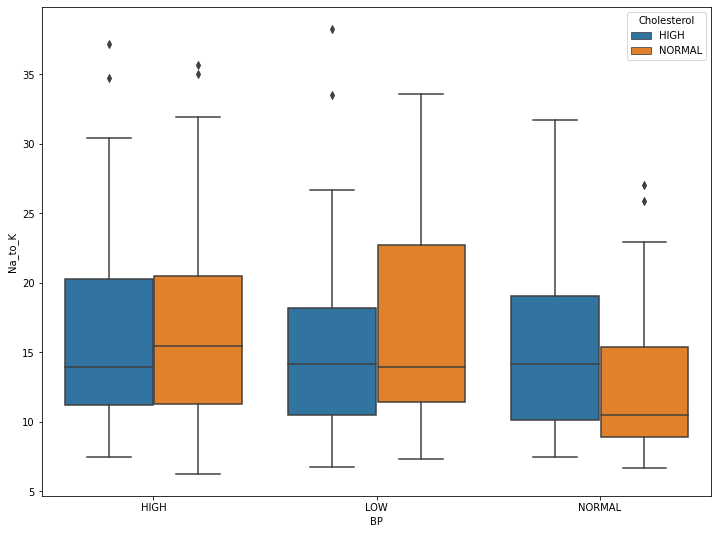

In [17]:
f, ax = plt.subplots(1, figsize=(12,9))
sns.boxplot(data=df, x="BP", y="Na_to_K", hue="Cholesterol")

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
label = "Drug"
features = df.drop(columns=label, axis=1).columns

In [20]:
x, y = df[features], df[label]

In [21]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, precision_score, recall_score, classification_report
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [23]:
numeric = ["Age", "Na_to_K"]
categorical = ["Sex", "BP", "Cholesterol"]

In [24]:
numeric_transf = Pipeline(steps=[("scaler", StandardScaler())])
categorical_transf = OneHotEncoder(handle_unknown="ignore")
preprocessor = ColumnTransformer(transformers=[
    ("num", numeric_transf, numeric),
    ("cat", categorical_transf, categorical)
])

In [25]:
r_forest_pipe = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", RandomForestClassifier())
])

In [26]:
r_forest_model = r_forest_pipe.fit(x_train, y_train)

In [27]:
r_forest_predictions = r_forest_model.predict(x_test)

In [28]:
confusion_matrix(y_test, r_forest_predictions)

array([[23,  0,  0,  0,  0],
       [ 0,  8,  0,  0,  0],
       [ 0,  1,  4,  0,  0],
       [ 0,  0,  0, 10,  0],
       [ 0,  0,  0,  0, 14]], dtype=int64)

In [29]:
print(classification_report(y_test, r_forest_predictions))

              precision    recall  f1-score   support

       DrugY       1.00      1.00      1.00        23
       drugA       0.89      1.00      0.94         8
       drugB       1.00      0.80      0.89         5
       drugC       1.00      1.00      1.00        10
       drugX       1.00      1.00      1.00        14

    accuracy                           0.98        60
   macro avg       0.98      0.96      0.97        60
weighted avg       0.99      0.98      0.98        60



In [30]:
knn_pipe = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", KNeighborsClassifier())
])

In [31]:
knn_model = knn_pipe.fit(x_train, y_train)

In [32]:
knn_predictions = knn_model.predict(x_test)

In [33]:
confusion_matrix(y_test, knn_predictions)

array([[17,  0,  1,  0,  5],
       [ 2,  6,  0,  0,  0],
       [ 0,  1,  4,  0,  0],
       [ 6,  0,  0,  4,  0],
       [ 6,  0,  0,  0,  8]], dtype=int64)

In [34]:
print(classification_report(y_test, knn_predictions))

              precision    recall  f1-score   support

       DrugY       0.55      0.74      0.63        23
       drugA       0.86      0.75      0.80         8
       drugB       0.80      0.80      0.80         5
       drugC       1.00      0.40      0.57        10
       drugX       0.62      0.57      0.59        14

    accuracy                           0.65        60
   macro avg       0.76      0.65      0.68        60
weighted avg       0.70      0.65      0.65        60



In [35]:
svc_pipe = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", SVC())
])

In [36]:
svc_model = svc_pipe.fit(x_train, y_train)

In [37]:
svc_predictions = svc_model.predict(x_test)

In [38]:
confusion_matrix(y_test, svc_predictions)

array([[21,  0,  1,  0,  1],
       [ 0,  8,  0,  0,  0],
       [ 0,  1,  4,  0,  0],
       [ 4,  0,  0,  6,  0],
       [ 1,  0,  0,  0, 13]], dtype=int64)

In [39]:
print(classification_report(y_test, svc_predictions))

              precision    recall  f1-score   support

       DrugY       0.81      0.91      0.86        23
       drugA       0.89      1.00      0.94         8
       drugB       0.80      0.80      0.80         5
       drugC       1.00      0.60      0.75        10
       drugX       0.93      0.93      0.93        14

    accuracy                           0.87        60
   macro avg       0.89      0.85      0.86        60
weighted avg       0.88      0.87      0.86        60



In [43]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder

In [53]:
for col in categorical:
    x_test[col] = LabelEncoder().fit_transform(x_test[col])

In [54]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,DrugY
1,47,1,1,0,13.093,drugC
2,47,1,1,0,10.114,drugC
3,28,0,2,0,7.798,drugX
4,61,0,1,0,18.043,DrugY


In [55]:
pca = PCA(n_components=2).fit(x_test)
x_test_2d = pca.transform(x_test)

In [56]:
x_test_2d

array([[-1.02280317e+01,  5.07723376e+00],
       [ 2.73251418e+01, -3.14814704e+00],
       [ 7.13175220e+00, -5.50758652e+00],
       [-2.53822736e+01,  3.21865133e+00],
       [-2.70794196e+01,  7.97426641e+00],
       [-6.64987516e+00, -1.76330526e+00],
       [ 1.05059870e+01,  1.30200432e-01],
       [-1.85523276e+01,  2.53204576e-01],
       [ 3.04653685e+01, -1.13083033e+00],
       [ 1.13321354e+01, -2.53651542e+00],
       [ 2.63159029e+01,  1.22737419e+01],
       [ 5.21449804e+00, -4.03580955e+00],
       [-2.59932900e+01, -6.29822045e+00],
       [-2.07433594e+01, -2.51491825e+00],
       [-2.62382455e+01,  5.34892548e+00],
       [-4.72986599e+00, -3.04772092e+00],
       [-1.91377475e-02, -7.47009460e+00],
       [-2.80060911e+00, -4.01975910e+00],
       [-1.71854387e+01,  2.14473360e+01],
       [-7.24079779e-01, -2.91493370e+00],
       [ 5.39181188e+00,  1.42359918e+01],
       [-3.05903903e+00, -8.23758578e+00],
       [-9.80221738e+00,  1.18053109e+01],
       [ 4.

In [60]:
def plot_categories(samples, categories):
    col_dic = {"DrugY": "blue", "drugC": "green", "drugX": "orange", "drugA": "brown", "drugB": "red"}
    mrk_dic = {"DrugY": "*", "drugC": "x", "drugX": "+", "drugA": "*", "drugB": "x"}
    colors = [col_dic[x] for x in categories]
    markers = [mrk_dic[x] for x in categories]
    for sample in range(len(categories)):
        plt.scatter(samples[sample][0], samples[sample][1], color = colors[sample], marker=markers[sample], s=100)
    plt.xlabel('Dimension 1')
    plt.ylabel('Dimension 2')
    plt.title('Assignments')
    plt.show()

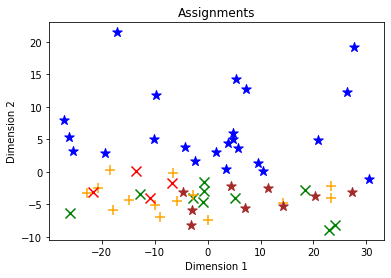

In [61]:
plot_categories(x_test_2d, r_forest_predictions)